<a href="https://colab.research.google.com/github/altaf1444/Capstone_EDA_Project/blob/main/AirBnb_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project - AirBnb Booking Analysis**



##### **Project Type**    - ***EDA***
##### **Contribution**    - ***Team***
##### **Team Member 1 -**  ***Altaf Shaikh***
##### **Team Member 2 -**  ***Priti Singh***


# **Project Summary**


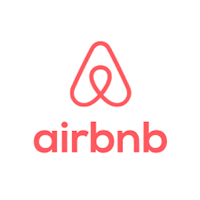
* The purpose of the analysis: Understanding the factors that influence Airbnb prices in New York City, or identifying patterns of all variables and Our analysis provides useful information for travelers and hosts in the city and also provides some best insights for Airbnb business.

* This project involved exploring and cleaning a dataset to prepare it for analysis. The data exploration process involved identifying and understanding the characteristics of the data, such as the data types, missing values, and distributions of values. The data cleaning process involved identifying and addressing any issues or inconsistencies in the data, such as errors, missing values, or duplicate records and remove outliers.

* Through this process, we were able to identify and fix any issues with the data, and ensure that it was ready for further analysis. This is an important step in any data analysis project, as it allows us to work with high-quality data and avoid any potential biases or errors that could affect the results. The clean and prepared data can now be used to answer specific research.

* Once the data has been cleaned and prepared, now begin exploring and summarizing it with describe the data and creating visualizations, and identifying patterns and trends in the data. in explore the data, may develop the relationships between different variables or the underlying causes of certain patterns or trends and other methods.

* Using data visualization to explore and understand patterns in Airbnb data. We created various graphs and charts to visualize the data, and wrote observations and insights below each one to help us better understand the data and identify useful insights and patterns.

* Through this process, we were able to uncover trends and relationships in the data that would have been difficult to identify through raw data alone, for example factors affecting prices and availability. We found that minimum nights, number of reviews, and host listing count are important for determining prices, and that availability varies significantly across neighborhoods. Our analysis provides useful information for travelers and hosts in the city.

* The observations and insights we identified through this process will be useful for future analysis and decision-making related to Airbnb. and also Our analysis provides useful information for travelers and hosts in the city.
















# **GitHub Link -**

https://github.com/altaf1444/Capstone_EDA_Project.git

# **Problem Statement**


1. What are the most popular neighborhoods for Airbnb rentals in New York City?
How do prices and availability vary by neighborhood?

2. How has the Airbnb market in New York City changed over time? Have there been any significant trends in terms of the number of listings, prices, or occupancy rates?

3. Are there any patterns or trends in terms of the types of properties that are being rented out on Airbnb in New York City? Are certain types of properties more popular or more expensive than others?

4. Are there any factors that seem to be correlated with the prices of Airbnb rentals in New York City?

5. The best area in New York City for a host to buy property at a good price rate and in an area with high traffic ?

6. How do the lengths of stay for Airbnb rentals in New York City vary by neighborhood? Do certain neighborhoods tend to attract longer or shorter stays?

7. How do the ratings of Airbnb rentals in New York City compare to their prices? Are higher-priced rentals more likely to have higher ratings?

8. Find the total numbers of Reviews and Maximum Reviews by Each Neighborhood Group.

9. Find Most reviewed room type in Neighborhood groups per month.

10. Find Best location listing/property location for travelers.

11. Find also best location listing/property location for Hosts.

12. Find Price variations in NYC Neighborhood groups.


# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Dataset Loading

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

In [ ]:
Airbnb_data = pd.read_csv('/content/drive/My Drive/Project-1/Airbnb NYC 2019.csv')

### Dataset First View

In [ ]:
Airbnb_data.head(10)


In [ ]:
Airbnb_data.tail(10)

### Dataset Rows & Columns count

In [ ]:
num_rows, num_columns = Airbnb_data.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

**There are 48895 rows & 16 columns in AirBnb data set**

### Dataset Information

In [ ]:
Airbnb_data.info()

**From the above info we found that host_name, neighbourhood_group, neighbourhood and room_type fall into categorical variable category.**

**While host_id, latitude, longitude, price, minimum_nights, number_of_reviews, last_review, reviews_per_month, host_listings_count, availability_365 are numerical variables**

#### Duplicate Values

In [ ]:
dup_val_count = Airbnb_data.duplicated().value_counts()
dup_val_count

**The above result: False means there were no duplicate values in 48895 rows**

#### Missing Values/Null Values

In [ ]:
missing_values_count = Airbnb_data.isnull().sum()
missing_values_count

In [ ]:
plt.figure(figsize=(10,6))
missing_values_count.plot(kind = 'bar',color = 'red' )
plt.title('Missing Values by Column')
plt.xlabel('Columns', color = 'red', size = 15)
plt.ylabel('Count of Missing Values', color = 'red', size = 15)
plt.xticks(rotation=75)
plt.show()

From the above bar plot we can clearly see :

There are **16** values in **name** & **21** values in **host_id** columns.

The major missing values are in **last_review** & **reviews_per_month** viz. **10052** each.

### What did you know about your dataset?

**1.** This Airbnb dataset contains 48895 rows with 16 columns of booking data of the AirBnb's in New York.

**2.** The Data includes both categorical and numeric values, providing a diverse range of information about the listings.

**3.** This Dataset may be useful for analyzing trends and patterns in the Airbnb market in New York and also gain insights into the preferences and behavior of Airbnb users in the area.

**4.** Based on the findings till now it can be concluded that the Airbnb dataset gives a glimpse of the kind of the data that can be fetched.

**5.** We can have a clear idea from the dataset, what kind of information is stored, how many rows and columns are there, how many null values are there etc.

**6.** Many columns in dataset hold null values. We have tried to find the null values in each column, last_review and reviews_per_month column having the most no.of nulls whereas name and hostname column having the least.

**7.** **last_review** and **reviews_per_month** column has NaN in the same rows stating that these 2 columns share some sort of correlation. Moreover **last_review** column is not important as much as **reviews_per_month** column, so we can drop it and fill NaN in **reviews_per_month** with 0.

**8.** NaN in name and host_name column are very less in number hence we can replace it with unknown in both the columns.

**9.** As data cleaning requires replacing null values but replacing null values can sometime mislead the dataset.
So, it must be worked upon cautiously only were its required.

## ***2. Understanding Your Variables***

In [ ]:
Airbnb_data.columns

In [ ]:
Airbnb_data.describe()

### Variables Description

**Variable list :**

**id** :- This is a unique identifier for each listing in the dataset.

**name** :- This is the name or title of the listing, as it appears on the Airbnb website.

**host_id** :- This is a unique identifier for each host in the dataset.

**host_name** :- This is the name of the host as it appears on the Airbnb website.

**neighbourhood_group** :- This is a grouping of neighborhoods in New York City, such as Manhattan or Brooklyn.

**neighbourhood** :- This is the specific neighborhood in which the listing is located.

**latitude** :- This is the geographic latitude of the listing.

**longitude** :- This is the geographic longitude of the listing.

**room_type** :- This is the type of room or property being offered, such as an entire home, private room, shared room.

**price** :- This is the nightly price for the listing, in US dollars.

**minimum_nights** :- This is the minimum number of nights that a guest must stay at the listing.

**total_reviews** :- This is the total number of reviews that the listing has received.

**reviews_per_month** :- This is the average number of reviews that the listing receives per month.

**calculated_host_listings_count** :- This is the total number of listings that the host has on Airbnb.

**availability_365** :- This is the number of days in the next 365 days that the listing is available for booking.

### Check Unique Values for each variable.

In [ ]:
print("Unique values in ['id']                             :", Airbnb_data["id"].nunique())
print("Unique values in ['host_id']                        :", Airbnb_data["host_id"].nunique())
print("Unique values in [latitude']                        :", Airbnb_data["latitude"].nunique())
print("Unique values in ['longitude']                      :", Airbnb_data["longitude"].nunique())
print("Unique values in ['price']                          :", Airbnb_data["price"].nunique())
print("Unique values in ['minimum_nights']                 :", Airbnb_data["minimum_nights"].nunique())
print("Unique values in ['number_of_reviews']              :", Airbnb_data["number_of_reviews"].nunique())
print("Unique values in ['reviews_per_month']              :", Airbnb_data["reviews_per_month"].nunique())
print("Unique values in ['calculated_host_listings_count'] :", Airbnb_data["calculated_host_listings_count"].nunique())
print("Unique values in ['availability_365']               :", Airbnb_data["availability_365"].nunique())



## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# removes duplicate rows if any
Airbnb_data.drop_duplicates(inplace=True)

# filling all NaN with 0 since we don't have any review in few of the months
Airbnb_data.fillna({'reviews_per_month':0}, inplace=True)

# droping off this column as it has many null values and not it's not required
Airbnb_data.drop("last_review", axis=1, inplace=True)

# replacing NaN with "unknown" in both "name" & "host_name" columns
Airbnb_data["name"].fillna("unknown", inplace=True)

Airbnb_data["host_name"].fillna("unknown", inplace=True)

# calculating the mean price
mean_price = Airbnb_data["price"].mean()

#replace price 0 with mean value
Airbnb_data.replace(0, mean_price, inplace=True)

Airbnb_data.isna().sum()

In [ ]:
Airbnb_data.shape

**As we can see in the above output, null values has been replaced**

### What all manipulations have you done and insights you found?

* We have done data wrangling on the previous dataset provided which had some missing values.
* As we initiated drop_duplicates() method but didn't find any duplicate values in the dataset.
* Then we performed isnull() to find null values and concluded that we have 4 columns with some null values.
* For name and host_name column replaced NaN with unknown as null values are very less in number. We could have dropped the columns but it would then remove some meaningful data as well.
* We then replaced the null values in reviews_per_month column with 0 as it didn't impact the meaning of dataset.
* Since last_review has numerous null values and the info contained in it is almost there in reviews_per_momth column, so we dropped it off.
* We made changes in "price" column, since property can't be available at 0 price. So, we replaced all price 0 with mean price value.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 >> Most Booked Properties [Top 5]

In [ ]:
hotel_name = Airbnb_data["neighbourhood_group"].value_counts().head(5)
hotel_name

colors = ['orange','violet','red','green','blue']

plt.bar(hotel_name.index, hotel_name.values, color=colors, edgecolor = 'black' )
plt.title("Top 5 Most booked Neighbourhood", fontsize = 15, color = 'r')
plt.xlabel("Neighbourhood Group", fontsize = 15, color = 'r')
plt.ylabel("Number of Bookings", fontsize = 15, color = 'r')
plt.show()

##### 1. Why did you pick the specific chart?

We picked bar plot to describe this data because it can describe the most booked neighbourhood data in a very discrete manner.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

In [ ]:
# Chart - 2 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

In [ ]:
# Chart - 3 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [ ]:
# Chart - 4 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

In [ ]:
# Chart - 5 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

In [ ]:
# Chart - 6 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

In [ ]:
# Chart - 7 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

In [ ]:
# Chart - 8 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

In [ ]:
# Chart - 9 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

In [ ]:
# Chart - 10 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***